In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [3]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

In [148]:
#let's preprocess data
df = df.drop(columns = ['Patient ID', 'OCD Diagnosis Date'], axis =1)
df.head()


,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [149]:
#let's see range of age
range_age = df['Age'].max() - df['Age'].min()
min_age = df['Age'].min()
max_age = df['Age'].max()
print("Range of age of people having OCD is:", range_age, "Minimum age being:", min_age, "and maximum being:", max_age)

Range of age of people having OCD is: 57 Minimum age being: 18 and maximum being: 75


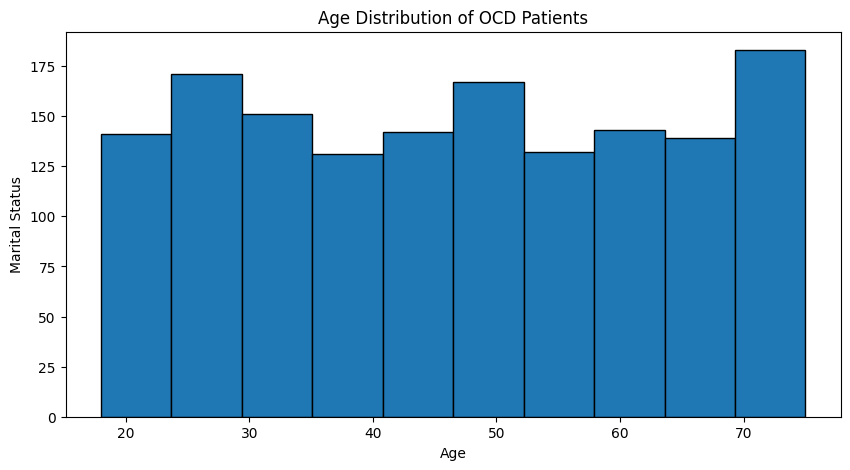

In [170]:
#let's make a graph of age which have OCD
plt.figure(figsize=(10,5))
age = df['Age']
plt.hist(age, bins=10, edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of OCD Patients')
plt.ylabel('Marital Status')
plt.show()

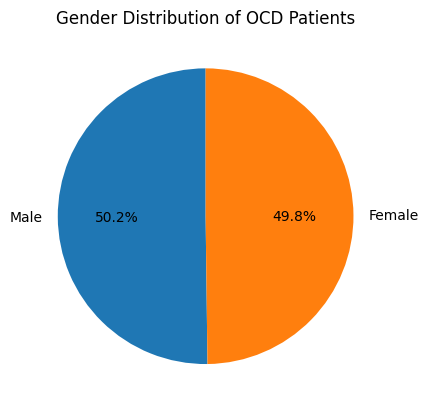

In [150]:
#let's see gender distribution 
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of OCD Patients')
plt.show()

In [151]:
#let's make a range of age
bins = [15, 20, 35, 60, np.inf]
label_age = ['Teen (15 - 19)', 'Adult(20 - 35)', 'Middle Age(36-60)', 'Senior Citizen(>60)']
df['age_range'] = pd.cut(df['Age'], bins = bins, labels = label_age, right = False)
df.head()

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,age_range
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Adult(20 - 35)
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Senior Citizen(>60)
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Middle Age(36-60)
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Adult(20 - 35)
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN,Middle Age(36-60)


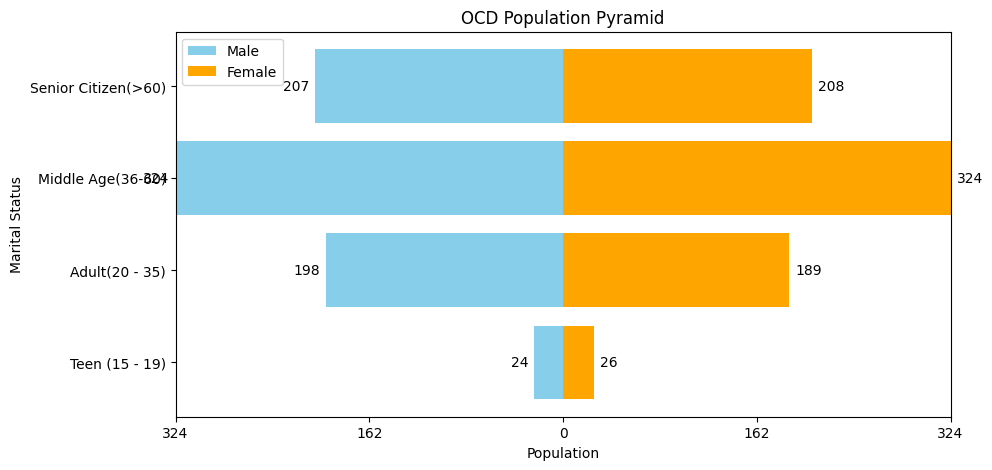

In [169]:
# age gender pyramid
male_counts = df[df['Gender'] == 'Male']['age_range'].value_counts().reindex(label_age, fill_value=0)
female_counts = df[df['Gender'] == 'Female']['age_range'].value_counts().reindex(label_age, fill_value=0)
data = {
	'Age Group': label_age,
	'Male': male_counts.values,
	'Female': female_counts.values
}

# Create a new DataFrame for plotting
pyramid_df = pd.DataFrame(data)
pyramid_df['Male_Adjusted'] = -pyramid_df['Male']

plt.figure(figsize=(10,5))

plt.barh(pyramid_df['Age Group'], pyramid_df['Male_Adjusted'], color='skyblue', label='Male')
plt.barh(pyramid_df['Age Group'], pyramid_df['Female'], color='orange', label='Female')

plt.title('OCD Population Pyramid')
plt.xlabel("Population")
plt.ylabel('Age Group')

# Adjust x-axis ticks to show positive values
max_pop = max(pyramid_df['Male'].max(), pyramid_df['Female'].max())
plt.xlim(-max_pop, max_pop)
plt.xticks([-max_pop, -max_pop/2, 0, max_pop/2, max_pop],
		   [str(max_pop), str(int(max_pop/2)), '0', str(int(max_pop/2)), str(max_pop)])
plt.ylabel('Marital Status')
# Add value labels to the bars
for i, (male, female) in enumerate(zip(pyramid_df['Male'], pyramid_df['Female'])):
	plt.text(-male - 5, i, str(male), color='black', va='center', ha='right')
	plt.text(female + 5, i, str(female), color='black', va='center', ha='left')
plt.legend()
plt.show()

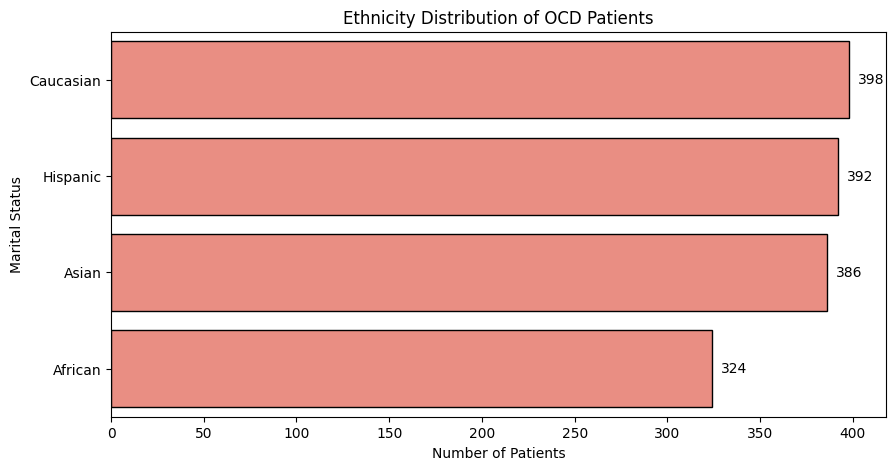

In [168]:
# Ethnicity and OCD
plt.figure(figsize=(10,5))
ethnicity_counts = df['Ethnicity'].value_counts()
sns.barplot(x=ethnicity_counts.values, y=ethnicity_counts.index, color = 'salmon', edgecolor = 'black')
plt.xlabel('Number of Patients')
plt.ylabel('Ethnicity')
plt.title('Ethnicity Distribution of OCD Patients')
plt.ylabel('Marital Status')
for i, v in enumerate(ethnicity_counts.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

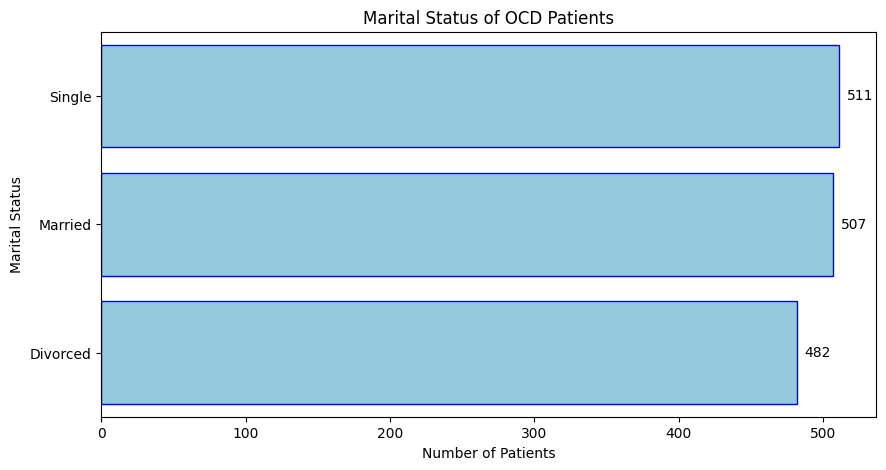

In [167]:
#let's check marital status
plt.figure(figsize=(10,5))
marital_counts = df['Marital Status'].value_counts()
sns.barplot(x=marital_counts.values, y=marital_counts.index, color='skyblue', edgecolor='blue')
plt.title('Marital Status of OCD Patients')
plt.xlabel('Number of Patients')
plt.ylabel('Marital Status')
for i, v in enumerate(marital_counts.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

In [155]:
#let's make ranges of Y-BOCS(Obsession) scale
bins_score = [0, 8, 16, 24, 32, 41]  # 5 bin edges for 4 labels, upper bound is exclusive if right=False
severity_Obsession = ['Sub-Clinical', 'Mild', 'Moderate', 'Severe', 'Extreme']  # 5 labels for 5 bins
df['Y-BOCS Severity(Obession)'] = pd.cut(df['Y-BOCS Score (Obsessions)'], bins=bins_score, labels=severity_Obsession, right=False)
df.head()

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,age_range,Y-BOCS Severity(Obession)
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Adult(20 - 35),Moderate
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Senior Citizen(>60),Moderate
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Middle Age(36-60),Sub-Clinical
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Adult(20 - 35),Mild
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN,Middle Age(36-60),Extreme


In [156]:
#let's make ranges of Y-BOCS(Compulsions) scale
bins_score = [0, 8, 16, 24, 32, 41]  # 5 bin edges for 4 labels, upper bound is exclusive if right=False
severity_compulsions = ['Sub-Clinical', 'Mild', 'Moderate', 'Severe', 'Extreme']  # 5 labels for 5 bins
df['Y-BOCS Severity(Compulsions)'] = pd.cut(df['Y-BOCS Score (Compulsions)'], bins=bins_score, labels=severity_compulsions, right=False)
df.head()

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,age_range,Y-BOCS Severity(Obession),Y-BOCS Severity(Compulsions)
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Adult(20 - 35),Moderate,Mild
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Senior Citizen(>60),Moderate,Severe
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Middle Age(36-60),Sub-Clinical,Sub-Clinical
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Adult(20 - 35),Mild,Severe
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN,Middle Age(36-60),Extreme,Moderate


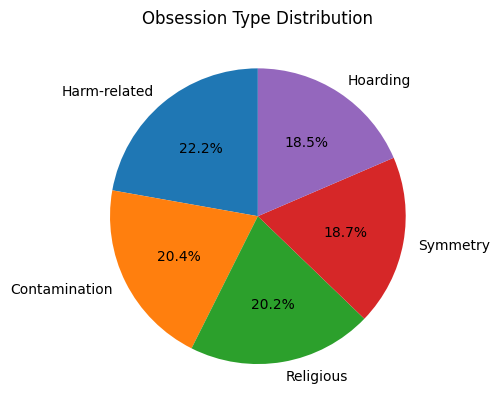

In [157]:
#let's see obssesion type and Y-BOCS Severity
obsession_count = df['Obsession Type'].value_counts()
plt.pie(obsession_count.values, labels=obsession_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Obsession Type Distribution')
plt.show()

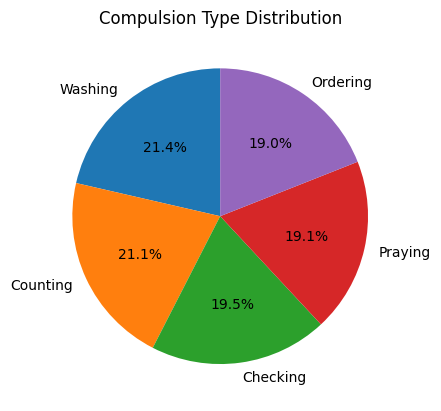

In [158]:
#let's see compulsion type and Y-BOCS Severity
compulsion_count = df['Compulsion Type'].value_counts()
plt.pie(compulsion_count.values, labels=compulsion_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Compulsion Type Distribution')
plt.show()

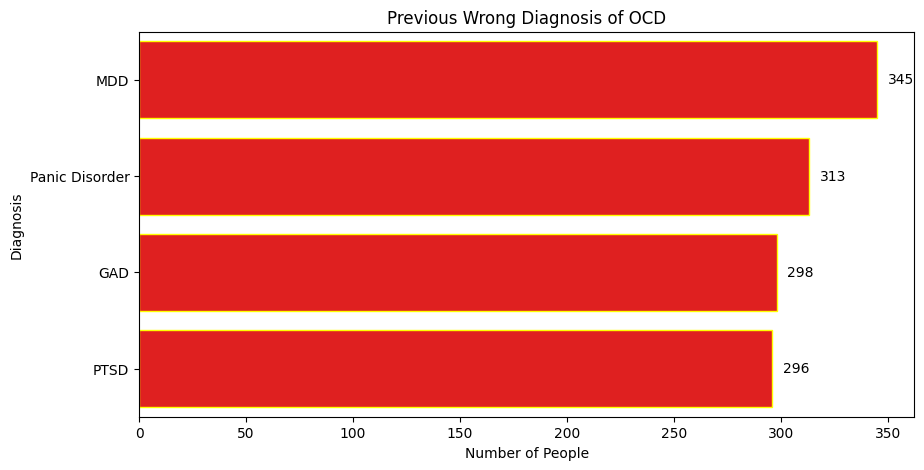

In [166]:
# What are early diagnoses of OCD
plt.figure(figsize=(10,5))
prev_diag_counts = df['Previous Diagnoses'].value_counts()
sns.barplot(x=prev_diag_counts.values, y=prev_diag_counts.index, color='red', edgecolor='yellow')
plt.title('Previous Wrong Diagnosis of OCD')
plt.xlabel('Number of People')
plt.ylabel('Diagnosis')
for i, v in enumerate(prev_diag_counts.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

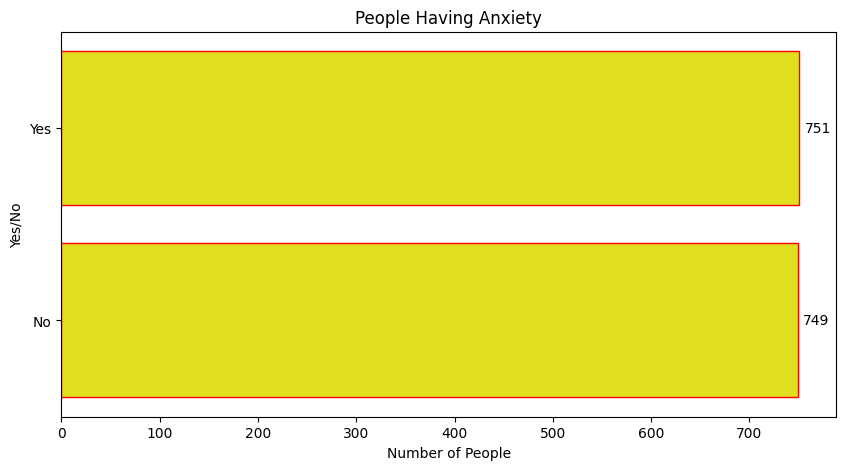

In [182]:
#let's see how many have Anxiety 
plt.figure(figsize=(10,5))
anxiety = df['Anxiety Diagnosis'].value_counts()
sns.barplot(x=anxiety.values, y=anxiety.index, color='yellow', edgecolor='red')
plt.title('People Having Anxiety')
plt.xlabel('Number of People')
plt.ylabel('Yes/No')
for i, v in enumerate(anxiety.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

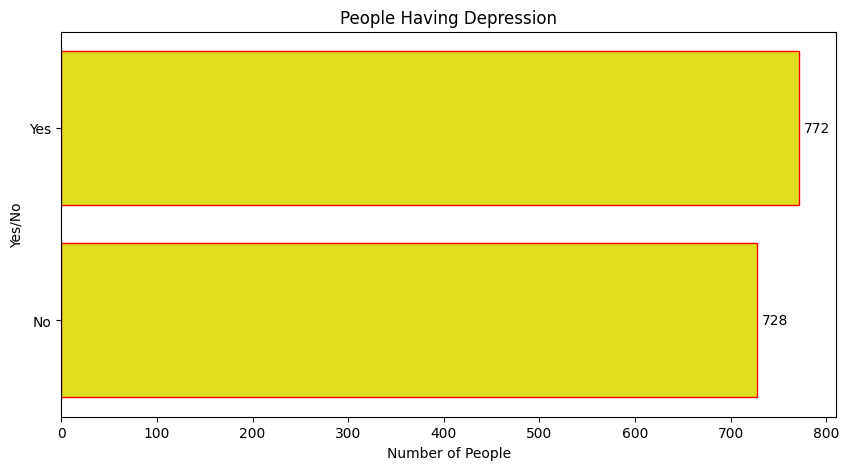

In [181]:
#let's see how many have Depression
plt.figure(figsize=(10,5))
depression = df['Depression Diagnosis'].value_counts()
sns.barplot(x=depression.values, y=depression.index, color='yellow', edgecolor='red')
plt.title('People Having Depression')
plt.xlabel('Number of People')
plt.ylabel('Yes/No')
for i, v in enumerate(depression.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

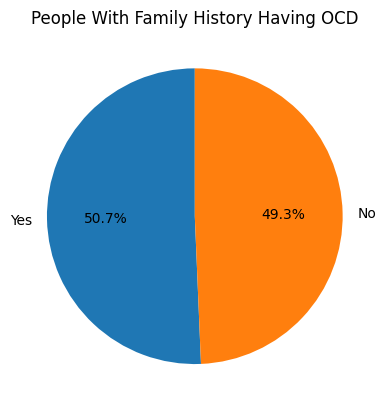

In [172]:
#family history of OCD and OCD
fami_history = df['Family History of OCD'].value_counts()
plt.pie(fami_history.values, labels=fami_history.index, autopct='%1.1f%%', startangle=90)
plt.title('People With Family History Having OCD')
plt.show()

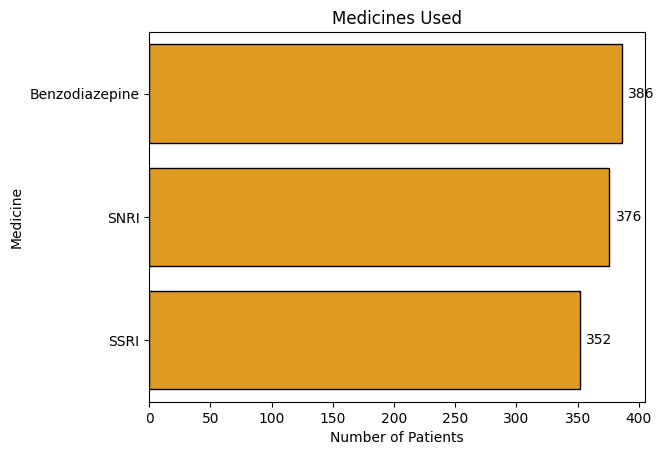

In [183]:
#Medication of OCD
medicine = df['Medications'].value_counts()
plt.Figure(figsize=(10,5))
sns.barplot(x = medicine.values, y = medicine.index, color = 'orange', edgecolor = 'black')
plt.title('Medicines Used')
plt.xlabel('Number of Patients')
plt.ylabel('Medicine')
for i, v in enumerate(medicine.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()

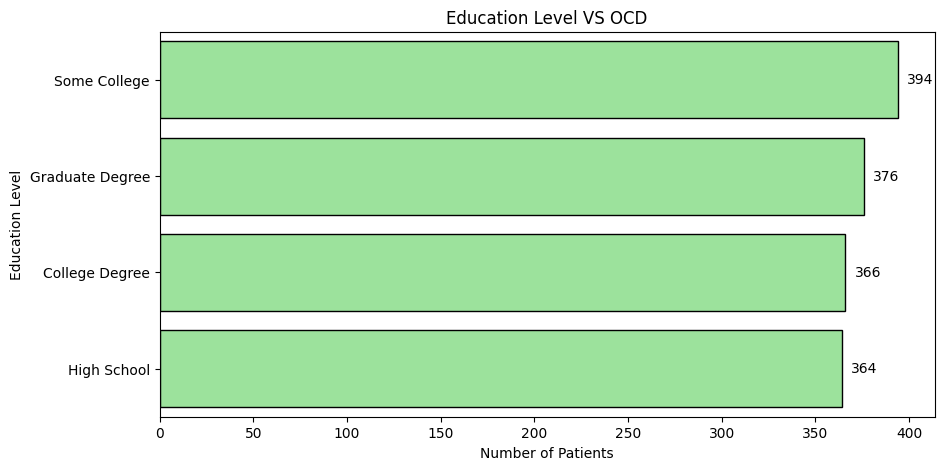

In [ ]:
#education level and OCD
education = df['Education Level'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = education.values, y = education.index, color = 'lightgreen', edgecolor = 'black')
plt.title('Education Level VS OCD')
plt.xlabel('Number of Patients')
plt.ylabel('Education Level')
for i, v in enumerate(education.values):
    plt.text(v + 5, i, str(v), color='black', va='center')
plt.show()